In [1]:
import dolfin as df
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

bash: /home/lecourtier/anaconda3/envs/phifem/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/lecourtier/anaconda3/envs/phifem/lib/libtinfo.so.6: no version information available (required by bash)


In [10]:
from utils import *
config = read_json_file()
geometry = config["geometry"]
if geometry == "square":
    int_a = -0.5
    int_b = 1.5
elif geometry == "circle":
    int_a = 0.0
    int_b = 1.0

In [3]:
from solver_fem import *
from solver_phifem import *

In [4]:
nb_vert = 10
fem_solver = FEMSolver(nb_vert, params=[[]])
phifem_solver = PhiFemSolver(nb_vert, params=[[]])

num of cell in the ghost penalty: 38


In [5]:
mesh_fem = fem_solver.mesh
mesh_phifem = phifem_solver.mesh
V_phifem = phifem_solver.V
mesh_macro_phifem = phifem_solver.mesh_macro

In [6]:
u_mesh = Function(V_phifem)
u_mesh.vector()[:] = 1.

Text(0.5, 1.0, 'mesh with PhiFEM')

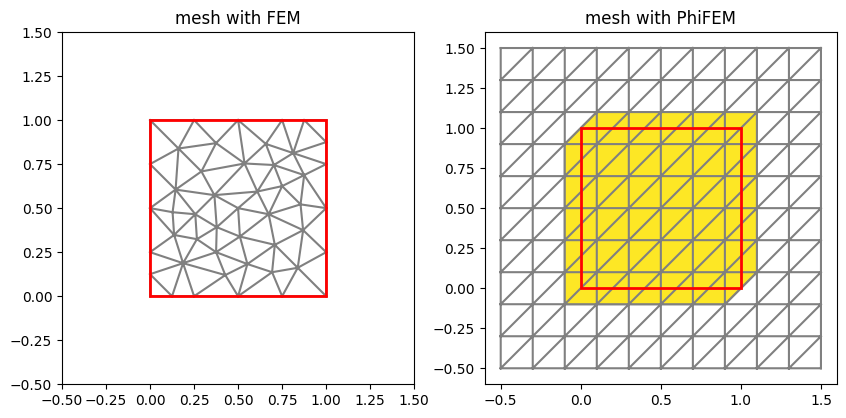

In [11]:
fig,axs = plt.subplots(1,2,figsize=(10,5))

plt.sca(axs[0])
df.plot(mesh_fem)
if geometry == "square":
    geom = plt.Rectangle([0,0],1,1, fill = False, linewidth=2, color="red" )
elif geometry == "circle":
    geom = plt.Circle( (0.5, 0.5 ), sqrt(2.)/4., fill = False, linewidth=2, color="red" )
axs[0].add_artist( geom )
axs[0].set_xlim(int_a,int_b)
axs[0].set_ylim(int_a,int_b)
axs[0].set_title("mesh with FEM")

plt.sca(axs[1])
df.plot(mesh_macro_phifem)
c = df.plot(u_mesh,mode='color', vmin=0, vmax=1)
df.plot(mesh_phifem)
if geometry == "square":
    geom = plt.Rectangle([0,0],1,1, fill = False, linewidth=2, color="red" )
elif geometry == "circle":
    geom = plt.Circle( (0.5, 0.5 ), sqrt(2.)/4., fill = False, linewidth=2, color="red" )
axs[1].add_artist( geom )
axs[1].set_title("mesh with PhiFEM")